# Урок 6

## Многомерный статистический анализ. Линейная регрессия

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

plt.style.use('seaborn-whitegrid')

#### Задача 1

Даны значения величины заработной платы заемщиков банка (`salary`) и значения их поведенческого кредитного скоринга (`scoring`):
```
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]
```
Возьмём в качестве признака значение `salary`, а в качестве целевой переменной - `scoring`.

1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов.
2. Постройте `scatter plot` по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1.
3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации.
4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера.
5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента.

Зададим изначальные данные

In [2]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

__1. Найдите коэффициенты линейной регрессии с помощью формул для парной регрессии, а затем с помощью метода наименьших квадратов__

__Парная регрессия__

In [3]:
x1 = np.array(salary)
y1 = np.array(scoring)

In [4]:
b1 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)

In [5]:
b1

2.620538882402765

In [6]:
b0 = y1.mean() - b1 * x1.mean()

In [7]:
b0

444.1773573243596

$$y = 444,1774 + 2,6205 \cdot x,$$

__Метод наименьших квадратов__

In [8]:
_x1 = pd.DataFrame({'x': np.ones(len(salary)), 'y': salary}).values

In [9]:
XTX = _x1.T.dot(_x1)
XTX_inv = np.linalg.inv(XTX)
b = XTX_inv.dot(_x1.T).dot(y1)
print(b)

[444.17735732   2.62053888]


$$y = 444,1774 + 2,6205 \cdot x,$$

__2. Постройте scatter plot по данным и отметьте на нём прямую линейной регрессии, полученную в п. 1__

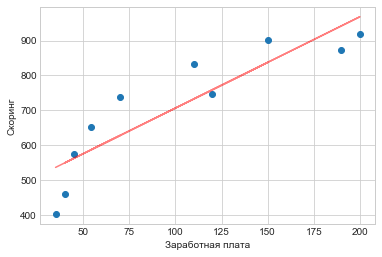

In [10]:
ox = x1
oy = b[0] + b[1] * ox

plt.scatter(x1, y1)
plt.plot(ox, oy, color='red', alpha=0.5)

plt.xlabel('Заработная плата')
plt.ylabel('Скоринг');

__3. Посчитайте коэффициент детерминации, среднюю ошибку аппроксимации__

Проверим несмещенность уравнения регрессии

In [11]:
_x1.dot(b).mean(), y1.mean()

(709.8999999999999, 709.9)

Очевидно, что наша модель является несмещенной.

In [12]:
R1 = np.corrcoef(x1, y1) ** 2
print(R1)

[[1.         0.78763866]
 [0.78763866 1.        ]]


Коэффициент детерминации
$$R^{2} = 0,7876$$

In [13]:
z = _x1.dot(b)
print(z)

[535.89621821 562.10160703 942.07974498 968.2851338  548.99891262
 627.61507909 585.68645697 837.25818968 758.64202321 732.43663439]


In [14]:
def mean_approximation_error(yr, yp):
    return 100 * np.abs((yr - yp) / yr).mean()

In [15]:
mean_approximation_error(y1, z)

11.469251843561711

Средняя ошибка аппроксимации
$$\overline{A} = 11,4693 %$$

__4. Оцените построенное уравнение регрессии с помощью F-критерия Фишера__

Число наблюдений $n = 10$

Число факторов $k = 1$

$k_2 = n - k - 1 = 8$

Посчитали статистику

In [16]:
k1 = 1
k2 = 8
R = R1[0][1]
F = (R / k1) / ((1 - R) / k2)

Посчитаем для уровня значимости $\alpha = 0,05$

In [17]:
alpha = 0.05
F_crit = stats.f.ppf(1 - alpha, k1, k2)
F_crit

5.317655071578714

Имеем $F > F_{crit}$, поэтому уравнение регрессии статистически значимо.

__5. Постройте для коэффициентов регрессии доверительные интервалы с помощью t-статистики Стьюдента__

In [18]:
def standard_error_slope(x, y, z):
    n = x.shape[0]
    upper = ((y - z) ** 2).sum() / (n - 2)
    lower = ((x - x.mean()) ** 2).sum()
    return np.sqrt(upper / lower)

In [19]:
s_slope = standard_error_slope(x1, y1, z)

In [20]:
s_slope

0.4810827956851601

Посчитаем квантиль $t_{1 - 0.05/2, \: 8}$.

In [21]:
t = stats.t.ppf(1 - alpha / 2, df=8)

In [22]:
t

2.3060041350333704

Доверительный интервал для параметра $b_1$:

In [23]:
(b1 - t * s_slope, b1 + t * s_slope)

(1.5111599662593715, 3.7299177985461585)

In [24]:
def standard_error_intercept(x, y, z):
    return standard_error_slope(x, y, z) * np.sqrt((x ** 2).mean())

In [25]:
s_intercept = standard_error_intercept(x1, y1, z)

In [26]:
s_intercept

56.46649755068154

Доверительный интервал для параметра $b_0$:

In [27]:
(b0 - t * s_intercept, b0 + t * s_intercept)

(313.9653804816363, 574.3893341670829)

#### Задача 2

Допустим, первые 5 клиентов из предыдущего задания проживают в Москве, а остальные - в Санкт-Петербурге. Влияет ли этот фактор на значение их кредитного скоринга?

 Необходимо проверить статистическую значимость отличия скоринга в Москве и в Санкт-Петербурге

In [28]:
scoring_M = np.array([401, 574, 874, 919, 459])
scoring_S = np.array([739, 653, 902, 746, 832])

In [29]:
n_M = scoring_M.shape[0]
n_S = scoring_S.shape[0]

In [30]:
n_M, n_S

(5, 5)

Выборочные средние по каждой группе:

In [31]:
scoring_M_mean = scoring_M.mean()
scoring_S_mean = scoring_S.mean()

In [32]:
scoring_M_mean, scoring_S_mean

(645.4, 774.4)

Видно, что средние значения скоринга разнятся. Проверим статистическую значимость этого отличия.

In [33]:
scoring_mean = y1.mean()

In [34]:
scoring_mean

709.9

In [35]:
S2_b = n_M * (scoring_M_mean - scoring_mean) ** 2 + n_S * (scoring_S_mean - scoring_mean) ** 2
S2_w = ((scoring_M - scoring_M_mean) ** 2).sum() + ((scoring_S - scoring_S_mean) ** 2).sum()

In [36]:
S2_b, S2_w

(41602.5, 263086.39999999997)

Посчитаем оценки дисперсий

In [37]:
sigma2_b = S2_b / k1
sigma2_w = S2_w / k2

In [38]:
sigma2_b, sigma2_w

(41602.5, 32885.799999999996)

Посчитаем статистику

In [39]:
F = sigma2_b / sigma2_w

In [40]:
F

1.2650596914169643

In [41]:
F_crit = stats.f.ppf(1 - alpha, k1, k2)

In [42]:
F_crit

5.317655071578714

$F < F_{crit}$, следовательно отличие средних значений скоринга является статистически не значимым.

Фактор проживания в разных городах на значение кредитного скоринга не влияет.

#### Задача 3

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.

In [43]:
x1 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
x2 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])
x3 = np.array([10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89])

Сравним среднее

In [44]:
x1.mean(), x2.mean(), x3.mean(), x4.mean()

(9.0, 9.0, 9.0, 9.0)

In [45]:
y1.mean(), y2.mean(), y3.mean(), y4.mean()

(7.500909090909093, 7.50090909090909, 7.5, 7.500909090909091)

Сравним дисперсию

In [46]:
x1.var(), x2.var(), x3.var(), x4.var()

(10.0, 10.0, 10.0, 10.0)

In [47]:
y1.var(), y2.var(), y3.var(), y4.var()

(3.7520628099173554, 3.752390082644628, 3.747836363636364, 3.7484082644628103)

Посчитаем линейную регрессию

In [48]:
b11 = np.cov(x1, y1, ddof=1)[0, 1] / np.var(x1, ddof=1)
b12 = np.cov(x2, y2, ddof=1)[0, 1] / np.var(x2, ddof=1)
b13 = np.cov(x3, y3, ddof=1)[0, 1] / np.var(x3, ddof=1)
b14 = np.cov(x4, y4, ddof=1)[0, 1] / np.var(x4, ddof=1)

In [49]:
b11, b12, b13, b14

(0.5000909090909093,
 0.5000000000000001,
 0.49972727272727285,
 0.49990909090909086)

In [50]:
b01 = y1.mean() - b11 * x1.mean()
b02 = y2.mean() - b12 * x2.mean()
b03 = y3.mean() - b13 * x3.mean()
b04 = y4.mean() - b14 * x4.mean()

In [51]:
b01, b02, b03, b04

(3.0000909090909094, 3.000909090909089, 3.002454545454544, 3.0017272727272735)

Уравнения регрессии

$$y1 = 3,0001 + 0,5001 \cdot x1$$
$$y2 = 3,0009 + 0,5000 \cdot x2$$
$$y3 = 3,0025 + 0,4997 \cdot x3$$
$$y4 = 3,0017 + 0,4999 \cdot x4$$

Посчитаем коэффициент корреляции Пирсона

In [52]:
np.corrcoef(x1, y1)[0, 1], np.corrcoef(x2, y2)[0, 1], np.corrcoef(x3, y3)[0, 1], np.corrcoef(x4, y4)[0, 1]

(0.81642051634484, 0.8162365060002428, 0.8162867394895984, 0.8165214368885028)

Построим графики

In [53]:
def plot_regr(x, b0, b1, y):
    x0 = np.array(x)
    np.sort(x0)
    z = b0 + b1 * x0
    plt.scatter(x, y)
    plt.plot(x0, z, color='red', alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y');

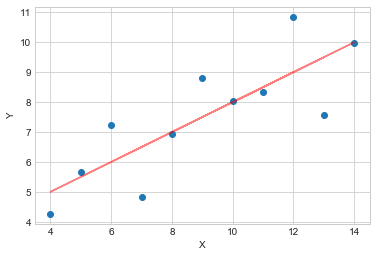

In [54]:
plot_regr(x1, b01, b11, y1)

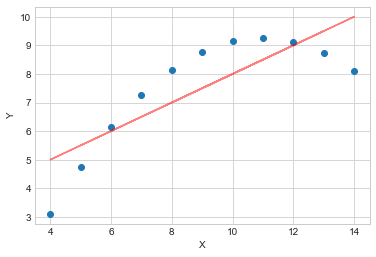

In [55]:
plot_regr(x2, b02, b12, y2)

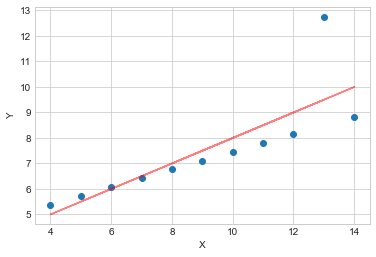

In [56]:
plot_regr(x3, b03, b13, y3)

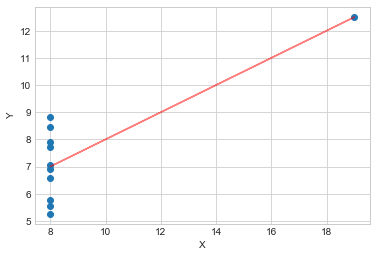

In [57]:
plot_regr(x4, b04, b14, y4)